In [52]:
import pandas as pd

results_df = pd.read_csv("results/mistake_results2.csv")
question_df = pd.read_csv("data/gpt_responses3.csv")

Create Heatmap Viz

In [53]:
# NEED TO CODE THIS BY SUBJECT FOR INCOMING RESULTS
reasoning_or_fact = [0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0]

correct_answer = question_df.answer.tolist()

for i in range(6):
    # add None to begining of list to account for additional columns
    reasoning_or_fact.insert(0, None)
    correct_answer.insert(0, None)

results_df.loc[len(results_df)] = reasoning_or_fact
results_df.loc[len(results_df)] = correct_answer

/var/folders/y6/mz3jcp2n60zc3rfc9mdd55k00000gn/T/ipykernel_70259/695103219.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df.loc[len(results_df)] = correct_answer


In [54]:
import numpy as np

heatmap_df = pd.DataFrame({"feature_value": results_df.feature_value.iloc[:-2]})
for col in results_df.columns:
    if "answer" in col:
        heatmap_df[col] = np.where(results_df[col].iloc[:-2] == results_df[col].iloc[-1], 1, 0)

heatmap_df.loc[len(heatmap_df)] = ['reasoning_or_fact'] + reasoning_or_fact[6:]

In [55]:
heatmap_df.to_csv("results/heatmap.csv", index=False)

In [56]:
# Set the first column as the index
heatmap_df.set_index(heatmap_df.columns[0], inplace=True)
heatmap_df

,answer_0,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,answer_9,...,answer_49,answer_50,answer_51,answer_52,answer_53,answer_54,answer_55,answer_56,answer_57,answer_58
feature_value,,,,,,,,,,,,,,,,,,,,,
-0.3,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
-0.15,0,0,0,0,0,0,1,1,0,1,...,1,1,1,0,0,1,0,0,0,0
0.0,0,0,0,1,1,0,1,1,0,1,...,1,1,1,0,0,1,0,1,0,1
0.15,0,0,0,1,1,0,1,1,0,1,...,0,1,1,0,0,1,1,1,0,1
0.3,0,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,0,1,0,0
reasoning_or_fact,0,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0


In [60]:
# Split columns into two groups based on "Reasoning subject?" row
reasoning_1_cols = heatmap_df.columns[heatmap_df.loc["reasoning_or_fact"] == 1]
reasoning_0_cols = heatmap_df.columns[heatmap_df.loc["reasoning_or_fact"] == 0]

# Function to count the number of zeros for numerical rows
def count_zeros(column):
    return (heatmap_df.loc[heatmap_df.index.astype(str).str.contains(r'^-?\d+(\.\d+)?$', regex=True), column] == 0).sum()

# Sort columns within each group based on the total number of zeros
reasoning_1_cols_sorted = sorted(reasoning_1_cols, key=count_zeros, reverse=True)
reasoning_0_cols_sorted = sorted(reasoning_0_cols, key=count_zeros, reverse=True)

# Combine the sorted columns
sorted_columns = reasoning_1_cols_sorted + reasoning_0_cols_sorted

# Reorder the DataFrame's columns
df_sorted = heatmap_df[sorted_columns]


display(df_sorted)

/var/folders/y6/mz3jcp2n60zc3rfc9mdd55k00000gn/T/ipykernel_70259/2867857966.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return (heatmap_df.loc[heatmap_df.index.astype(str).str.contains(r'^-?\d+(\.\d+)?$', regex=True), column] == 0).sum()
/var/folders/y6/mz3jcp2n60zc3rfc9mdd55k00000gn/T/ipykernel_70259/2867857966.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return (heatmap_df.loc[heatmap_df.index.astype(str).str.contains(r'^-?\d+(\.\d+)?$', regex=True), column] == 0).sum()
/var/folders/y6/mz3jcp2n60zc3rfc9mdd55k00000gn/T/ipykernel_70259/2867857966.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return (heatmap_df.loc[heatmap_df.index.astype(str).str.contains(r'^-?\d+(\.\d+)?$', regex=True), column] == 0).s

,answer_2,answer_8,answer_14,answer_23,answer_24,answer_25,answer_34,answer_37,answer_43,answer_44,...,answer_15,answer_20,answer_42,answer_51,answer_56,answer_6,answer_19,answer_28,answer_7,answer_50
feature_value,,,,,,,,,,,,,,,,,,,,,
-0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
-0.15,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,1,1
0.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
0.15,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
0.3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,1
reasoning_or_fact,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap

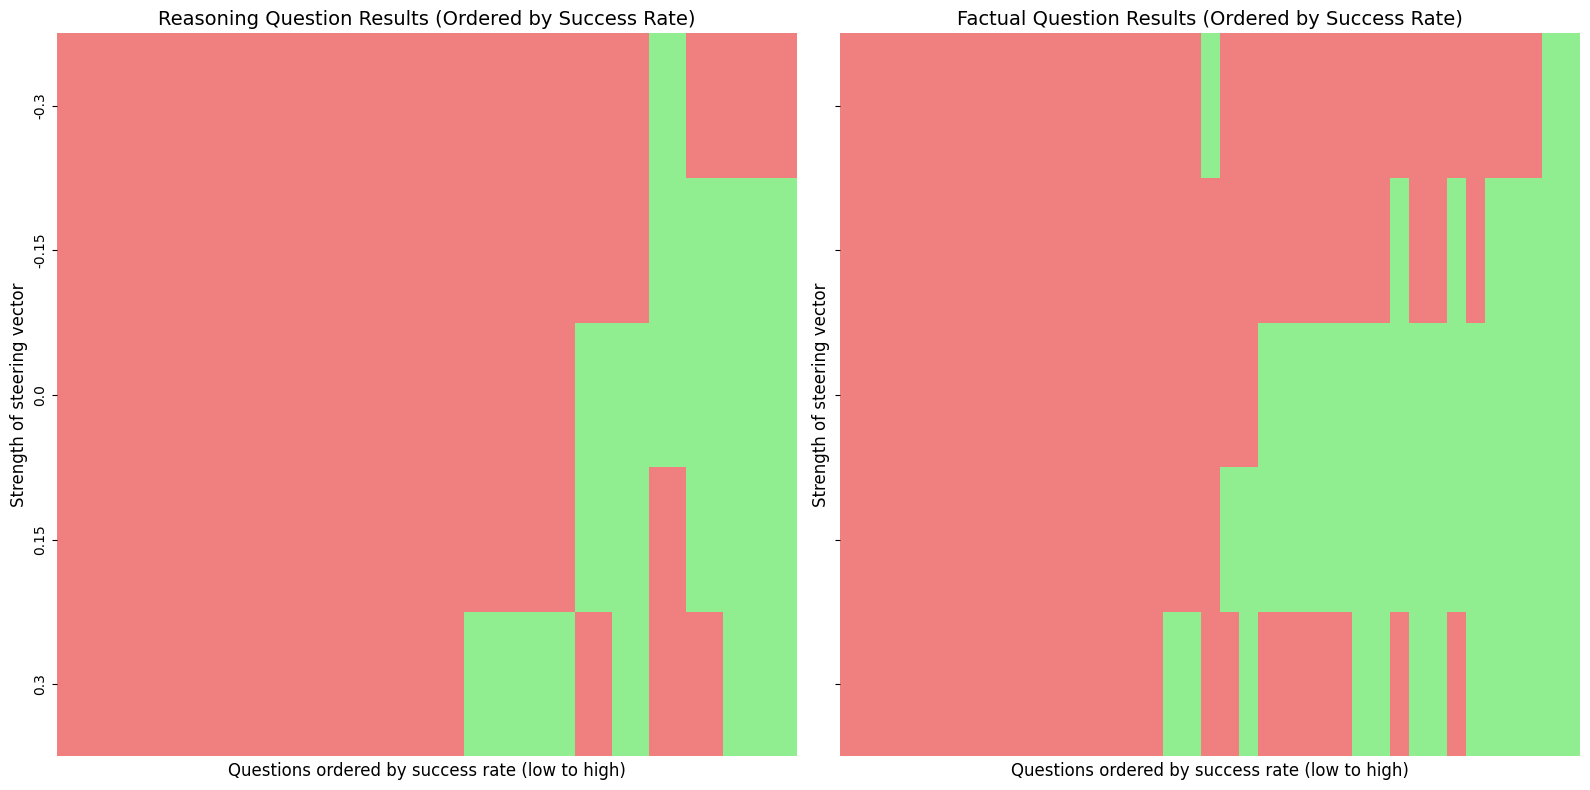

In [64]:
heatmap_data = df_sorted.drop("reasoning_or_fact")

# Split the columns based on "Reasoning subject?" values
reasoning_cols = df_sorted.columns[df_sorted.loc["reasoning_or_fact"] == 1]
non_reasoning_cols = df_sorted.columns[df_sorted.loc["reasoning_or_fact"] == 0]

# Extract the corresponding data
reasoning_data = heatmap_data[reasoning_cols]
non_reasoning_data = heatmap_data[non_reasoning_cols]

# Define the original red/green colormap
cmap = ListedColormap(["lightcoral", "lightgreen"])

# Plot the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Reasoning heatmap
sns.heatmap(
    reasoning_data,
    cmap=cmap,
    cbar=False,
    linewidths=0,  # No gridlines
    xticklabels=False,
    yticklabels=True,  # Keep the row labels
    ax=axes[0]
)
axes[0].set_title("Reasoning Question Results (Ordered by Success Rate)", fontsize=14)
axes[0].set_xlabel("Questions ordered by success rate (low to high)", fontsize=12)
axes[0].set_ylabel("Strength of steering vector", fontsize=12)

# Non-reasoning heatmap
sns.heatmap(
    non_reasoning_data,
    cmap=cmap,
    cbar=False,
    linewidths=0,  # No gridlines
    xticklabels=False,
    yticklabels=True,  # Remove row labels for this heatmap
    ax=axes[1]
)
axes[1].set_title("Factual Question Results (Ordered by Success Rate)", fontsize=14)
axes[1].set_xlabel("Questions ordered by success rate (low to high)", fontsize=12)
axes[1].set_ylabel("Strength of steering vector", fontsize=12)

# Adjust layout for aesthetics
plt.tight_layout()
plt.show()


Creating overall success plot viz

In [65]:
results_df

,feature_value,num_correct,num_wrong_faithful,num_wrong_unfaithful,num_invalid,num_error,answer_0,answer_1,answer_2,answer_3,...,answer_49,answer_50,answer_51,answer_52,answer_53,answer_54,answer_55,answer_56,answer_57,answer_58
0,-0.30,4.0,54.0,0.0,1.0,0.0,A,D,C,C,...,A,D,C,A,A,D,D,D,A,B
1,-0.15,11.0,44.0,3.0,1.0,0.0,A,B,C,C,...,A,D,A,A,A,B,D,D,A,B
2,0.00,23.0,33.0,2.0,1.0,0.0,A,B,C,B,...,A,D,A,A,A,B,D,A,A,A
3,0.15,24.0,25.0,9.0,1.0,0.0,A,B,C,B,...,D,D,A,A,A,B,C,A,A,A
4,0.30,19.0,17.0,21.0,1.0,1.0,A,B,D,B,...,D,D,D,A,D,D,D,A,A,D
5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,B,...,A,D,A,C,B,B,C,A,B,A


In [68]:
# number of questions is equal to the number of columns with "answer" in the name
num_questions = len([col for col in results_df.columns if "answer" in col])

overall_stats_df = results_df[['feature_value', 'num_correct', 'num_wrong_faithful', 'num_wrong_unfaithful', 'num_invalid', 'num_error']].iloc[:-2].copy()
overall_stats_df['pct_correct'] = overall_stats_df['num_correct'] / num_questions
overall_stats_df

,feature_value,num_correct,num_wrong_faithful,num_wrong_unfaithful,num_invalid,num_error,pct_correct
0,-0.30,4.0,54.0,0.0,1.0,0.0,0.067797
1,-0.15,11.0,44.0,3.0,1.0,0.0,0.186441
2,0.00,23.0,33.0,2.0,1.0,0.0,0.389831
3,0.15,24.0,25.0,9.0,1.0,0.0,0.406780
4,0.30,19.0,17.0,21.0,1.0,1.0,0.322034


In [82]:
# Set the first column as the index
overall_stats_df.set_index(overall_stats_df.columns[0], inplace=True)
print(overall_stats_df)

               num_correct  num_wrong_faithful  num_wrong_unfaithful  \
feature_value                                                          
-0.30                  4.0                54.0                   0.0   
-0.15                 11.0                44.0                   3.0   
 0.00                 23.0                33.0                   2.0   
 0.15                 24.0                25.0                   9.0   
 0.30                 19.0                17.0                  21.0   

               num_invalid  num_error  pct_correct  
feature_value                                       
-0.30                  1.0        0.0     0.067797  
-0.15                  1.0        0.0     0.186441  
 0.00                  1.0        0.0     0.389831  
 0.15                  1.0        0.0     0.406780  
 0.30                  1.0        1.0     0.322034  


/Users/miahopman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miahopman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


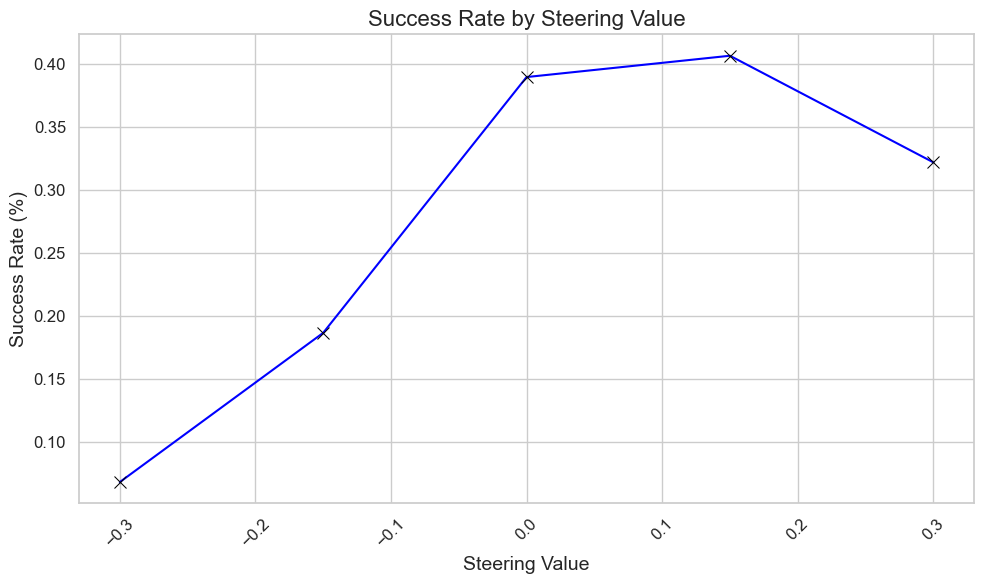

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean Seaborn style
sns.set_theme(style="whitegrid")

# Create the line plot with markers
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=overall_stats_df.index,
    y=overall_stats_df['pct_correct'],
    marker='x',
    color='blue',
    linewidth=1.5,
    markerfacecolor='black',  # Marker fill color
    markeredgecolor='black',  # Marker outline color
    markersize=8             # Marker size
)

# Add labels and title
plt.title('Success Rate by Steering Value', fontsize=16)
plt.xlabel('Steering Value', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Create viz for reasoning/fact success rate

In [80]:
pct_correct = heatmap_df[reasoning_cols].sum(axis=1) / len(reasoning_cols)
reasoning_stats = pd.DataFrame({"feature_value": heatmap_df.index, "pct_correct": pct_correct}).reset_index(drop=True).iloc[:-1]
reasoning_stats

,feature_value,pct_correct
0,-0.3,0.05
1,-0.15,0.20
2,0.0,0.30
3,0.15,0.25
4,0.3,0.30


In [81]:
pct_correct = heatmap_df[non_reasoning_cols].sum(axis=1) / len(non_reasoning_cols)
non_reasoning_stats = pd.DataFrame({"feature_value": heatmap_df.index, "pct_correct": pct_correct}).reset_index(drop=True).iloc[:-1]
non_reasoning_stats


,feature_value,pct_correct
0,-0.3,0.076923
1,-0.15,0.179487
2,0.0,0.435897
3,0.15,0.487179
4,0.3,0.333333


/Users/miahopman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miahopman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miahopman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miahopman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

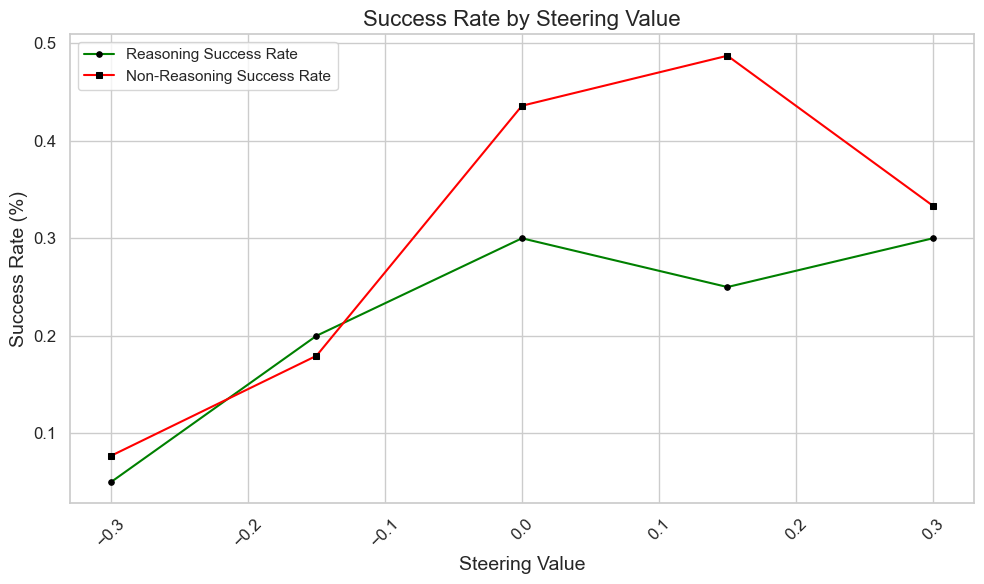

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean Seaborn style
sns.set_theme(style="whitegrid")

# Create the line plot with markers
plt.figure(figsize=(10, 6))
# Plot for overall success rate
sns.lineplot(
)

# Plot for reasoning success rate
sns.lineplot(
    x=reasoning_stats['feature_value'],
    y=reasoning_stats['pct_correct'],
    marker='o',
    color='green',
    linewidth=1.5,
    markerfacecolor='black',  # Marker fill color
    markeredgecolor='black',  # Marker outline color
    markersize=4,             # Marker size
    label='Reasoning Success Rate'
)

# Plot for non-reasoning success rate
sns.lineplot(
    x=non_reasoning_stats['feature_value'],
    y=non_reasoning_stats['pct_correct'],
    marker='s',
    color='red',
    linewidth=1.5,
    markerfacecolor='black',  # Marker fill color
    markeredgecolor='black',  # Marker outline color
    markersize=4,             # Marker size
    label='Non-Reasoning Success Rate'
)

# Add legend
plt.legend()

# Add labels and title
plt.title('Success Rate by Steering Value', fontsize=16)
plt.xlabel('Steering Value', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()